In [1]:
#Importing important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df=pd.read_csv("data/diabetes.csv")

In [3]:
#Displaying the first five rows in the dataset
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Displaying the last five rows in the dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## DATA DESCRIPTION

In [5]:
# 768 rows, 9 columns
df.shape

(768, 9)

In [6]:
#Feature information - column name , null count and Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# count- no.of entries in a column
# mean- average value of all enteries in a column
# std- standard deviation of the column
# min- minimum value in the column
# 25% - 25th percentile, also known as the first quartile
# 50% - 50th percentile, also known as the median
# 75% - 75th percentile, also known as the third quartile
# max- maximum value in the column


df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# 500 occurences of 'Outcome'=0,i.e,"no diabetes"
# 268 occurences of 'Outcome'=1,i.e,"has diabetes"

## DOES 500 VS 268 LEAD TO CLASS IMBALANCE?? EXPLORE

df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
# percentage of each value in 'Outcome' column/label
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [10]:
# checking dataset for null values
'''
even though the no.of null values for each column is being displayed as 0 , check the dataset because some columns have
the entry '0' which can be considered as null values
'''
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
'''
in some columns the value '0' doesnt make sense, for example, glucose level cannot be 0, SkinThickness cant be 0
so we replace all the 0's with NaN- not a number
'''

df.replace(0, np.nan).isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## DATA CLEANING

In [12]:
'''
Here our goal is to replace the NaN values created in each column by the mean value of that column

'''

columns_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for column in columns_to_impute:
    df[column] = df[column].replace(0, df[column].mean())

## DATA VISUALIZATION

## HISTOGRAM

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

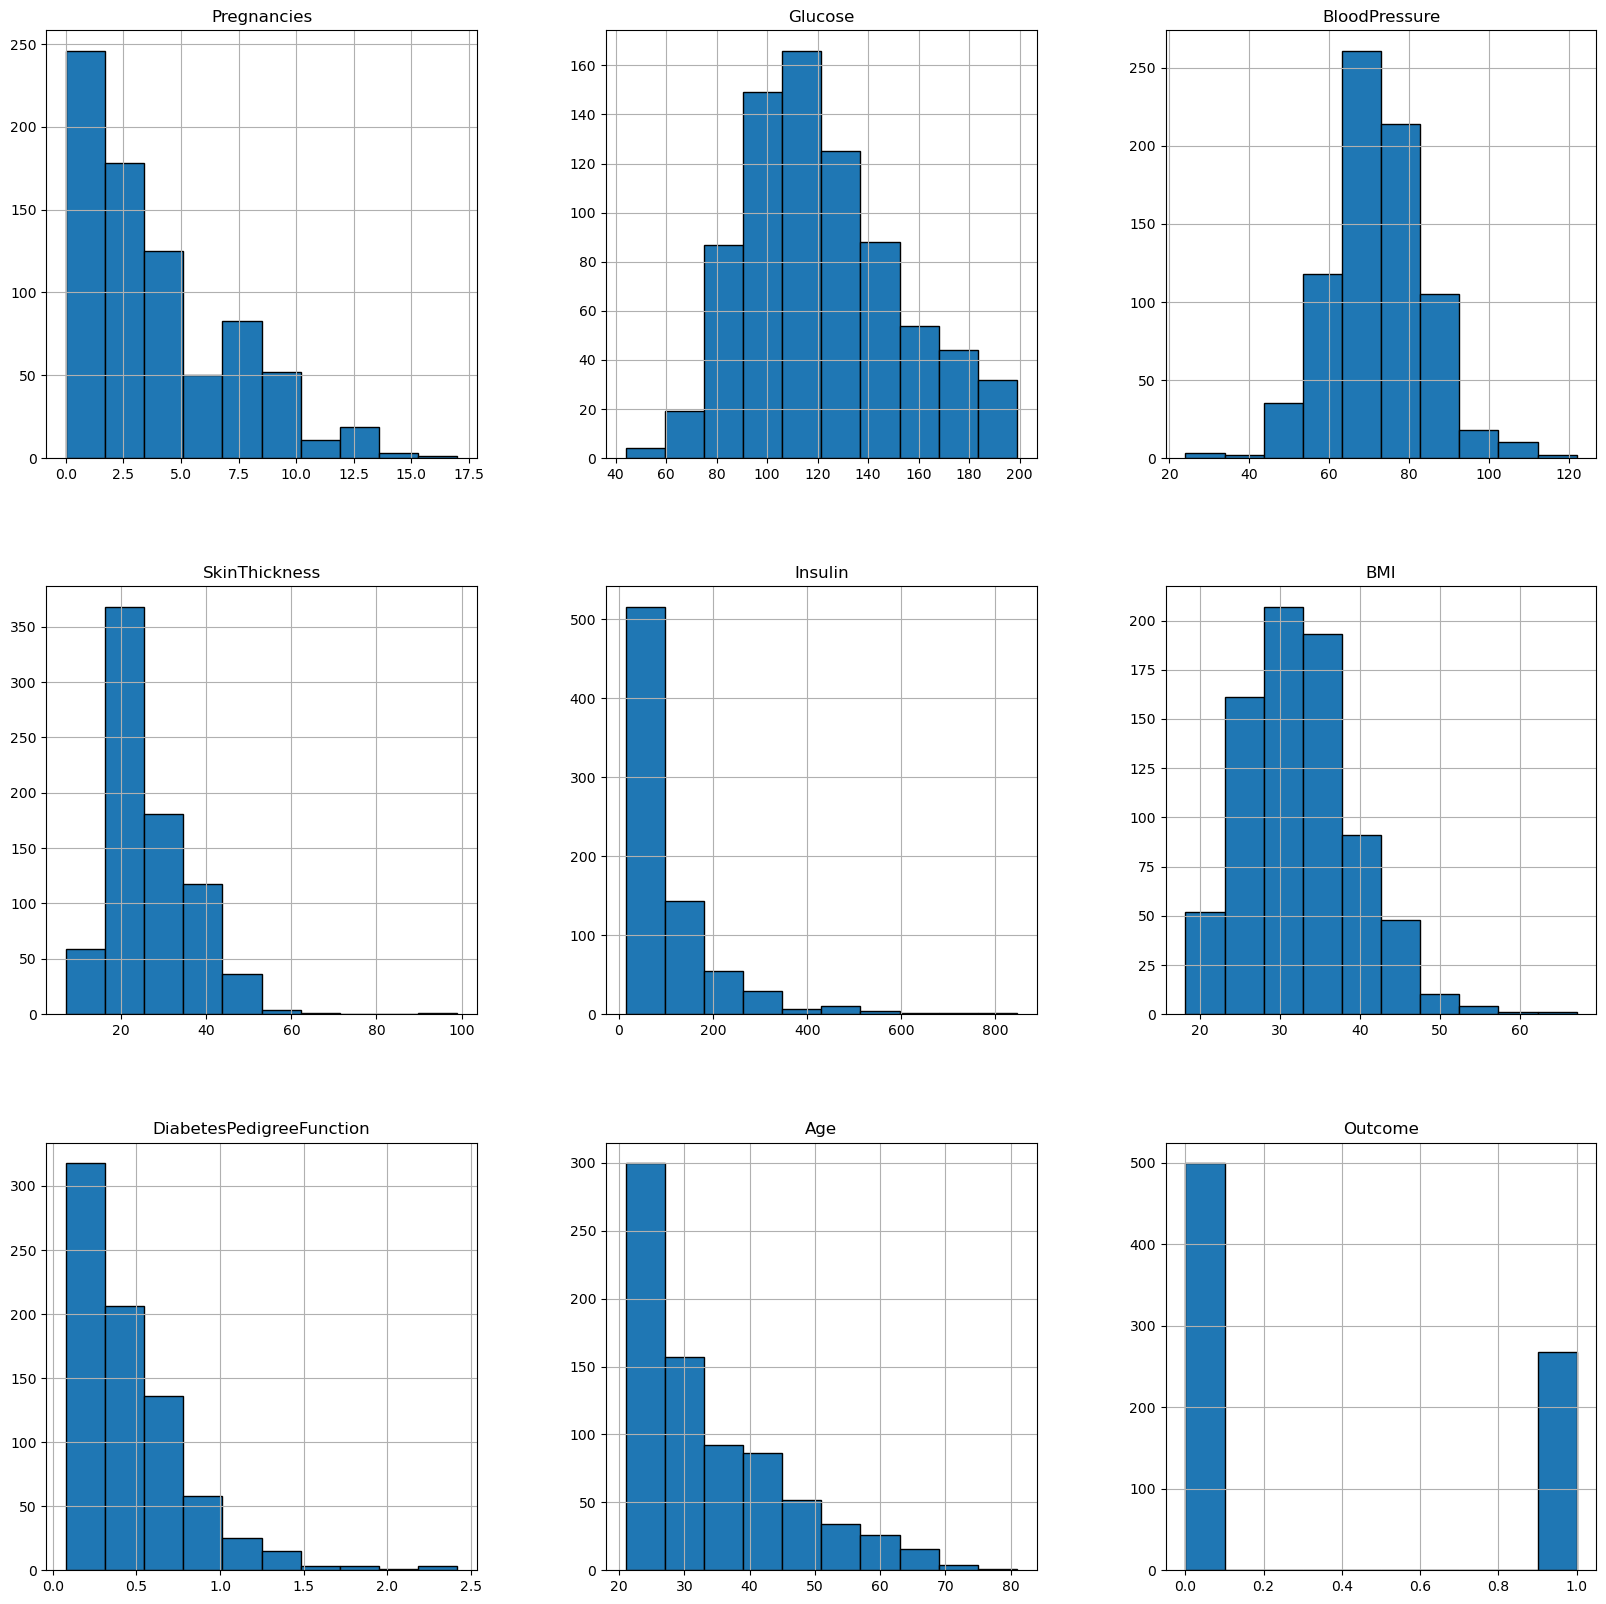

In [13]:
# Histogram for each feature/column in the dataset
# X-axis displays the distribution of values in that particular column
# Y-axis displays the number of values corresponding to the X-axis values

df.hist(edgecolor = "black",figsize=(20, 20))

## HISTPLOT - INCLUDING KDE

<Axes: xlabel='BMI', ylabel='Count'>

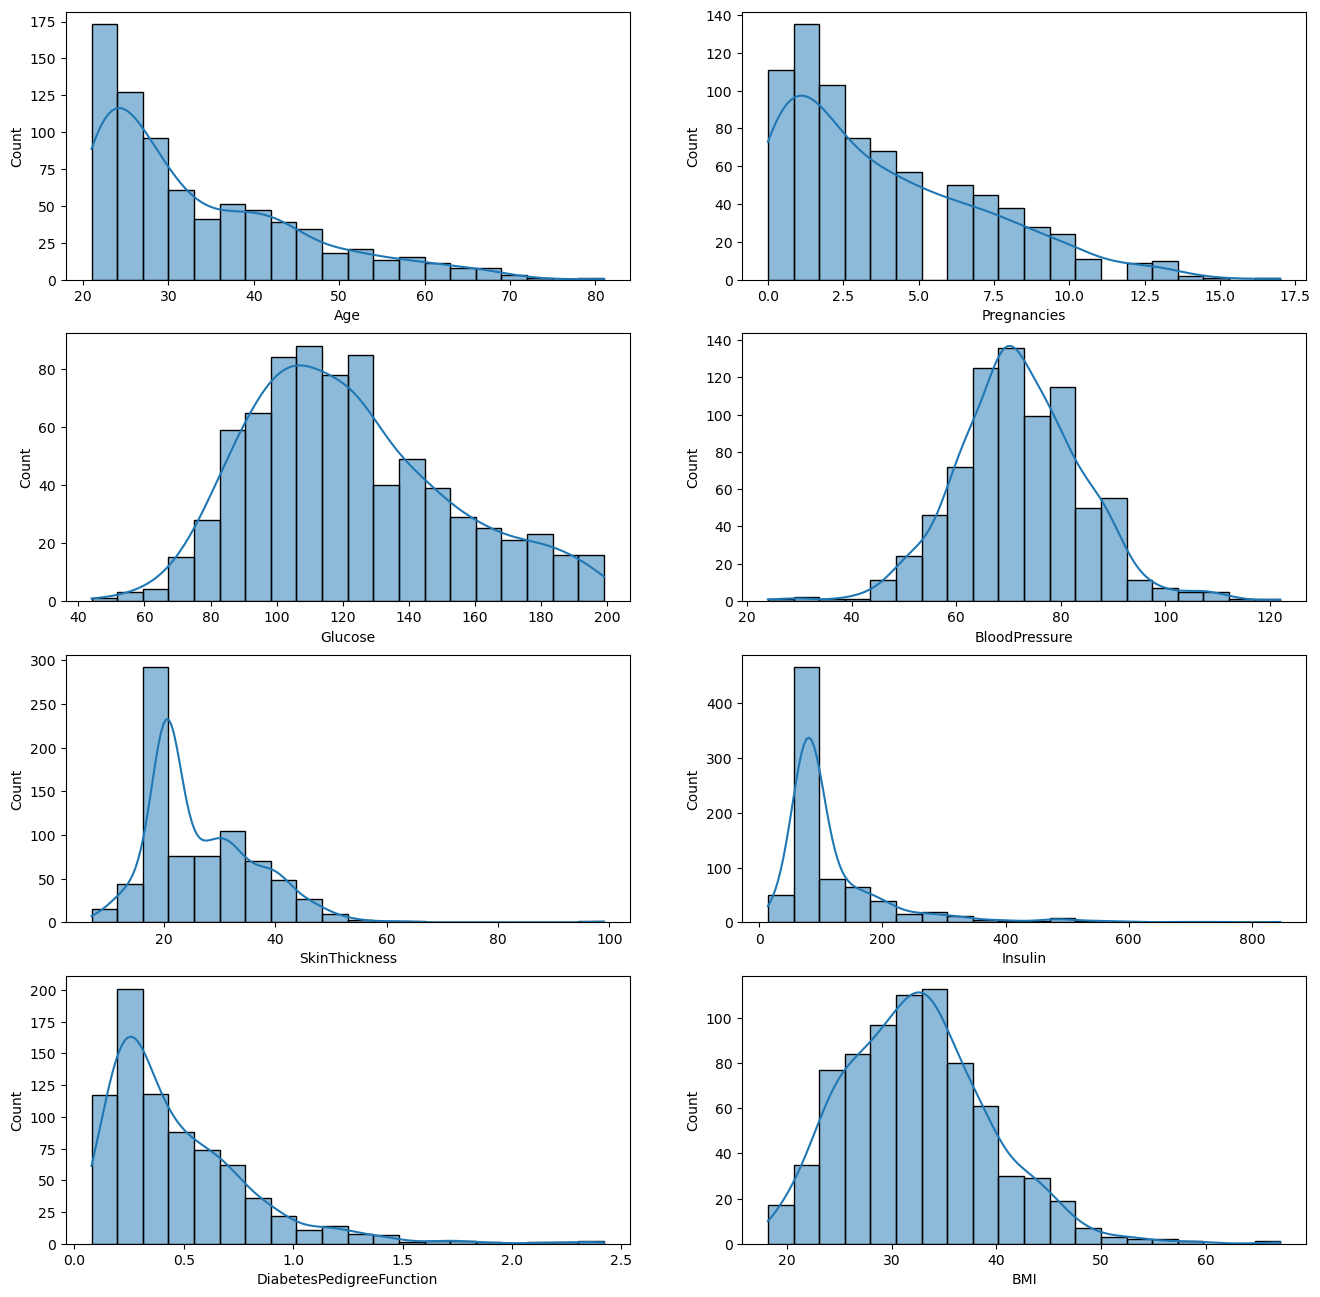

In [14]:
# fig - is the overall figure object
# ax - the individual plots 
# 4,2 - indicates that the plots should be arranged in 4 rows and 2 columns way
# figsize(16,16) - size of each figure is 16 inches x 16 inches

''' for example, sns.histplot(df.Age, bins=20, kde=True, ax=ax[0,0]) means 
# histplot - used to plot a histogram
# df.Age - column/feature 
# bins- no.of towers to be created in the histogram
# kde= True - this is very important as it differentiates a histogram and a kde plot,i.e, 
  Kernel Density Estimate - KDE plots provide a continuous estimate of the distribution.
# ax=ax[0,0]- place the plot in 0th row , 0th column 
  (similarly ax[1,2] means place the plot in row 1 and column 2)
  
  arrangement of the 'ax' values-
  [0,0]  [0,1]
  [1,0]  [1,1]
  [2,0]  [2,1]
  [3,0]  [3,1]
'''


fig, ax = plt.subplots(4, 2, figsize=(16, 16))
sns.histplot(df.Age, bins=20, kde=True, ax=ax[0,0])
sns.histplot(df.Pregnancies, bins=20, kde=True, ax=ax[0,1])
sns.histplot(df.Glucose, bins=20, kde=True, ax=ax[1,0])
sns.histplot(df.BloodPressure, bins=20, kde=True, ax=ax[1,1])
sns.histplot(df.SkinThickness, bins=20, kde=True, ax=ax[2,0])
sns.histplot(df.Insulin, bins=20, kde=True, ax=ax[2,1])
sns.histplot(df.DiabetesPedigreeFunction, bins=20, kde=True, ax=ax[3,0])
sns.histplot(df.BMI, bins=20, kde=True, ax=ax[3,1])


## OUTCOME VS MEAN VALUES IN EACH COLUMN

In [15]:
'''
Running a python function to print the mean value of each column/feature with respect to the outcome
for example, whichever row in the dataset has Outcome=0 , the mean value of pregnancies for those rows is 3.298000
             whichever row in the dataset has Outcome=1 , the mean value of pregnancies for those rows is 4.865672

'''
col_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in col_list:
    # Group by "Outcome" and calculate the mean for the current column
    result = df.groupby("Outcome")[col].mean().reset_index()
    
    # Rename the columns for better readability
    result.columns = ["Outcome", f"Mean_{col}"]
    
    # Print the result
    print(f"\nMean {col} by Outcome:")
    print(result.to_string(index=False))
    



Mean Pregnancies by Outcome:
 Outcome  Mean_Pregnancies
       0          3.298000
       1          4.865672

Mean Glucose by Outcome:
 Outcome  Mean_Glucose
       0    110.705367
       1    142.159661

Mean BloodPressure by Outcome:
 Outcome  Mean_BloodPressure
       0           70.810008
       1           74.950326

Mean SkinThickness by Outcome:
 Outcome  Mean_SkinThickness
       0           25.373135
       1           28.907494

Mean Insulin by Outcome:
 Outcome  Mean_Insulin
       0    106.457354
       1    141.426597

Mean BMI by Outcome:
 Outcome  Mean_BMI
       0 30.880066
       1 35.381288

Mean DiabetesPedigreeFunction by Outcome:
 Outcome  Mean_DiabetesPedigreeFunction
       0                       0.429734
       1                       0.550500

Mean Age by Outcome:
 Outcome  Mean_Age
       0 31.190000
       1 37.067164


## PIE-CHART FOR DISTRIBUTION OF OUTCOMES
## BAR CHART FOR DISTRIBUTION OF OUTCOMES

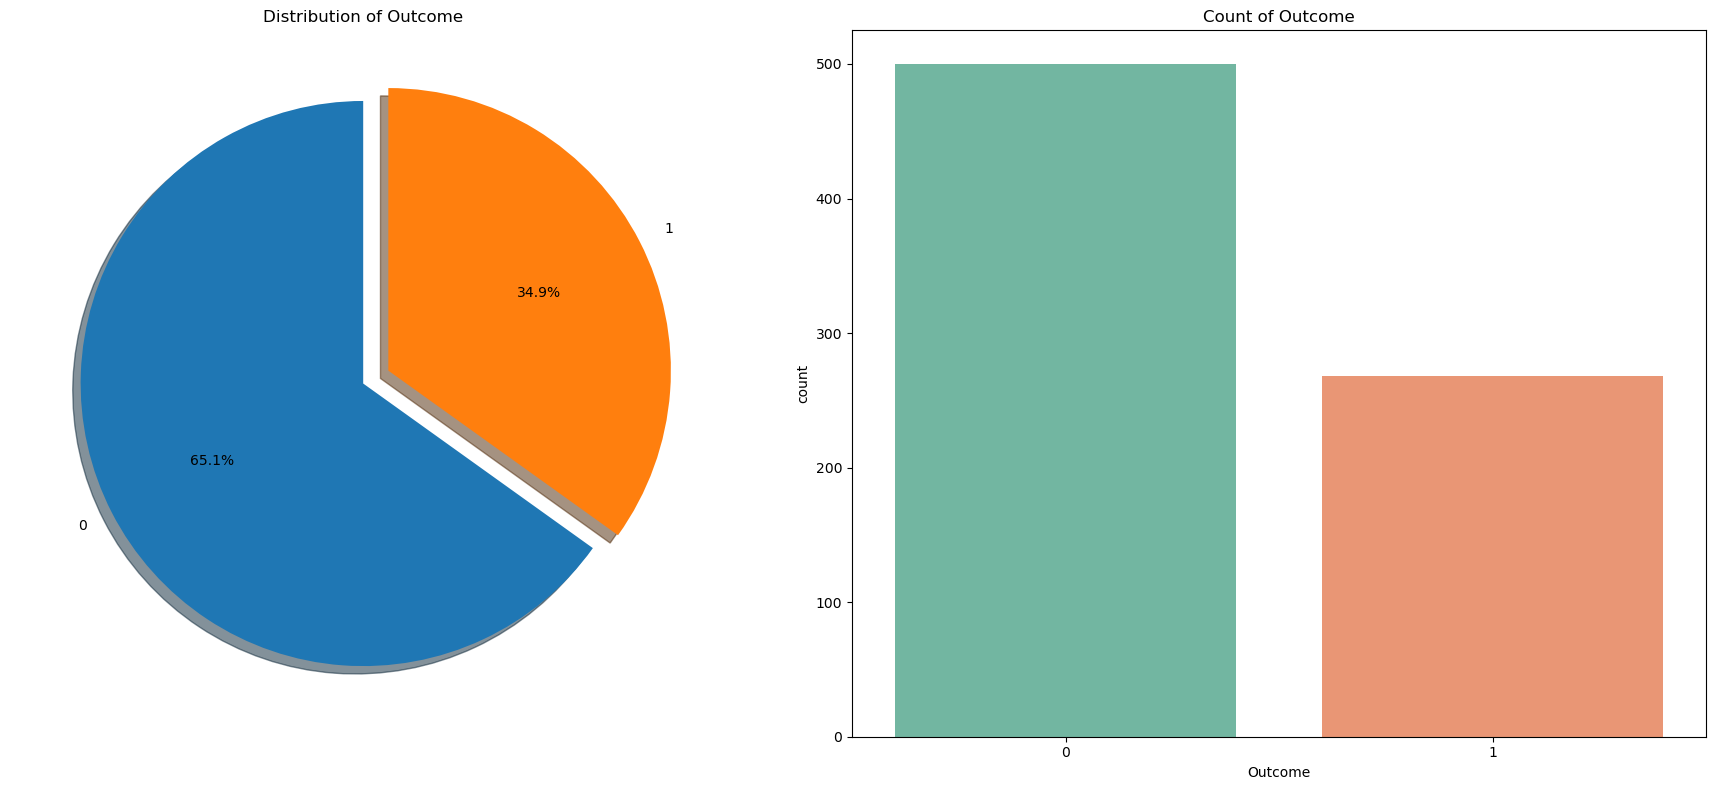

In [16]:

# Create a figure with two subplots- 1 figure consisting of 2 plots
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Pie chart for Outcome distribution
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, startangle=90)
ax[0].set_title('Distribution of Outcome')
ax[0].set_ylabel('')  # Remove the default yheading

# Plot 2: Count plot for Outcome
sns.countplot(x='Outcome', data=df, ax=ax[1], palette='Set2')  # Specify x='Outcome' column/label
ax[1].set_title('Count of Outcome')
ax[1].set_xlabel('Outcome')  # Add heading for x-axis

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## CORRELATION MATRIX

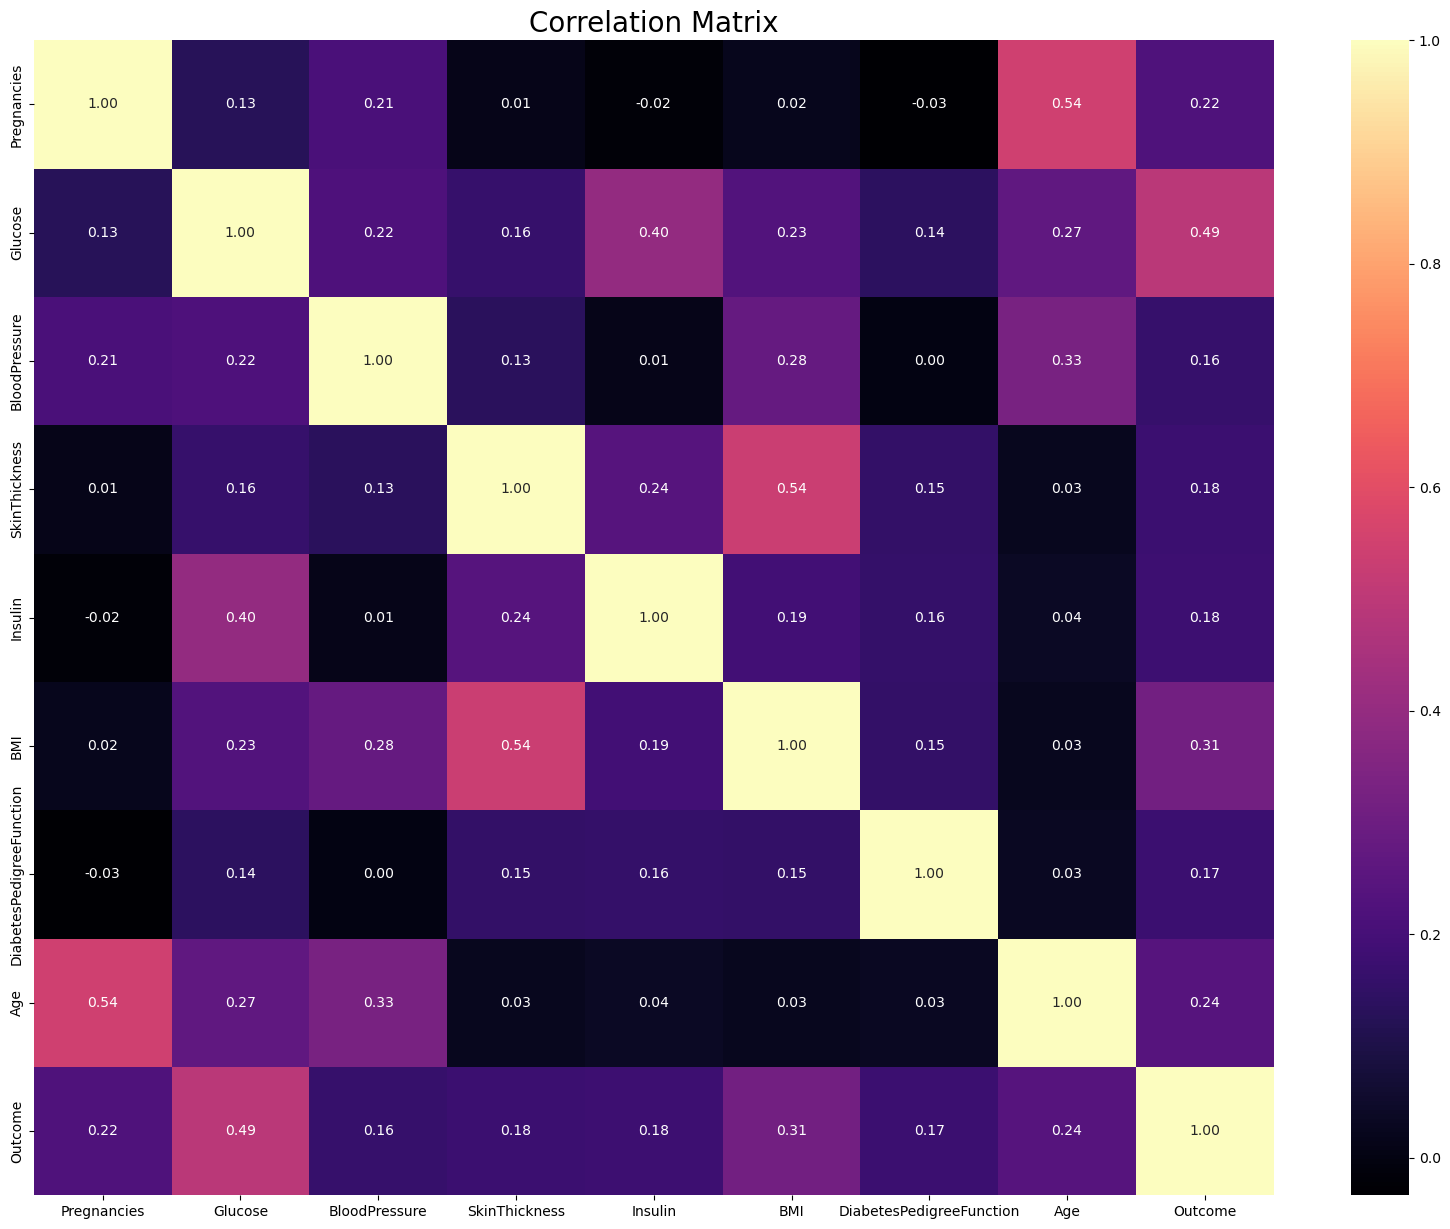

In [17]:
'''
Correlation matrix is one of the most important visual plots to understand how similar 2 features/columns are,i.e, how similar
they are.

1: Perfect positive correlation
0: No correlation or Weak Correlation
-1: Perfect negative correlation

Strong Positive Correlation:
Coefficients close to 1 indicate that as one variable increases, the other variable tends to also increase, and vice versa.

Strong Negative Correlation:
Coefficients less than 0 and close to -1 indicate that as one variable increases, the other variable tends to decrease, and vice versa.

No or Weak Correlation:
Coefficients close to 0 suggest that there is no linear relationship between the variables.

!!! the below values are just examples , domain knowledge is required to understand the correlation
0.7 to 0.9 (and above): Generally considered a strong positive correlation.
-0.7 to -0.9 (and below): Generally considered a strong negative correlation.

!!! again domain knowledge is important for the below point
usually , if 2 features/columns are highly correlated => 1 feature/column can be removed

'''

f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

## OUTLIER PLOTS

#### Outliers are data points that significantly differ from other observations in a dataset (usually checked using a boxplot)

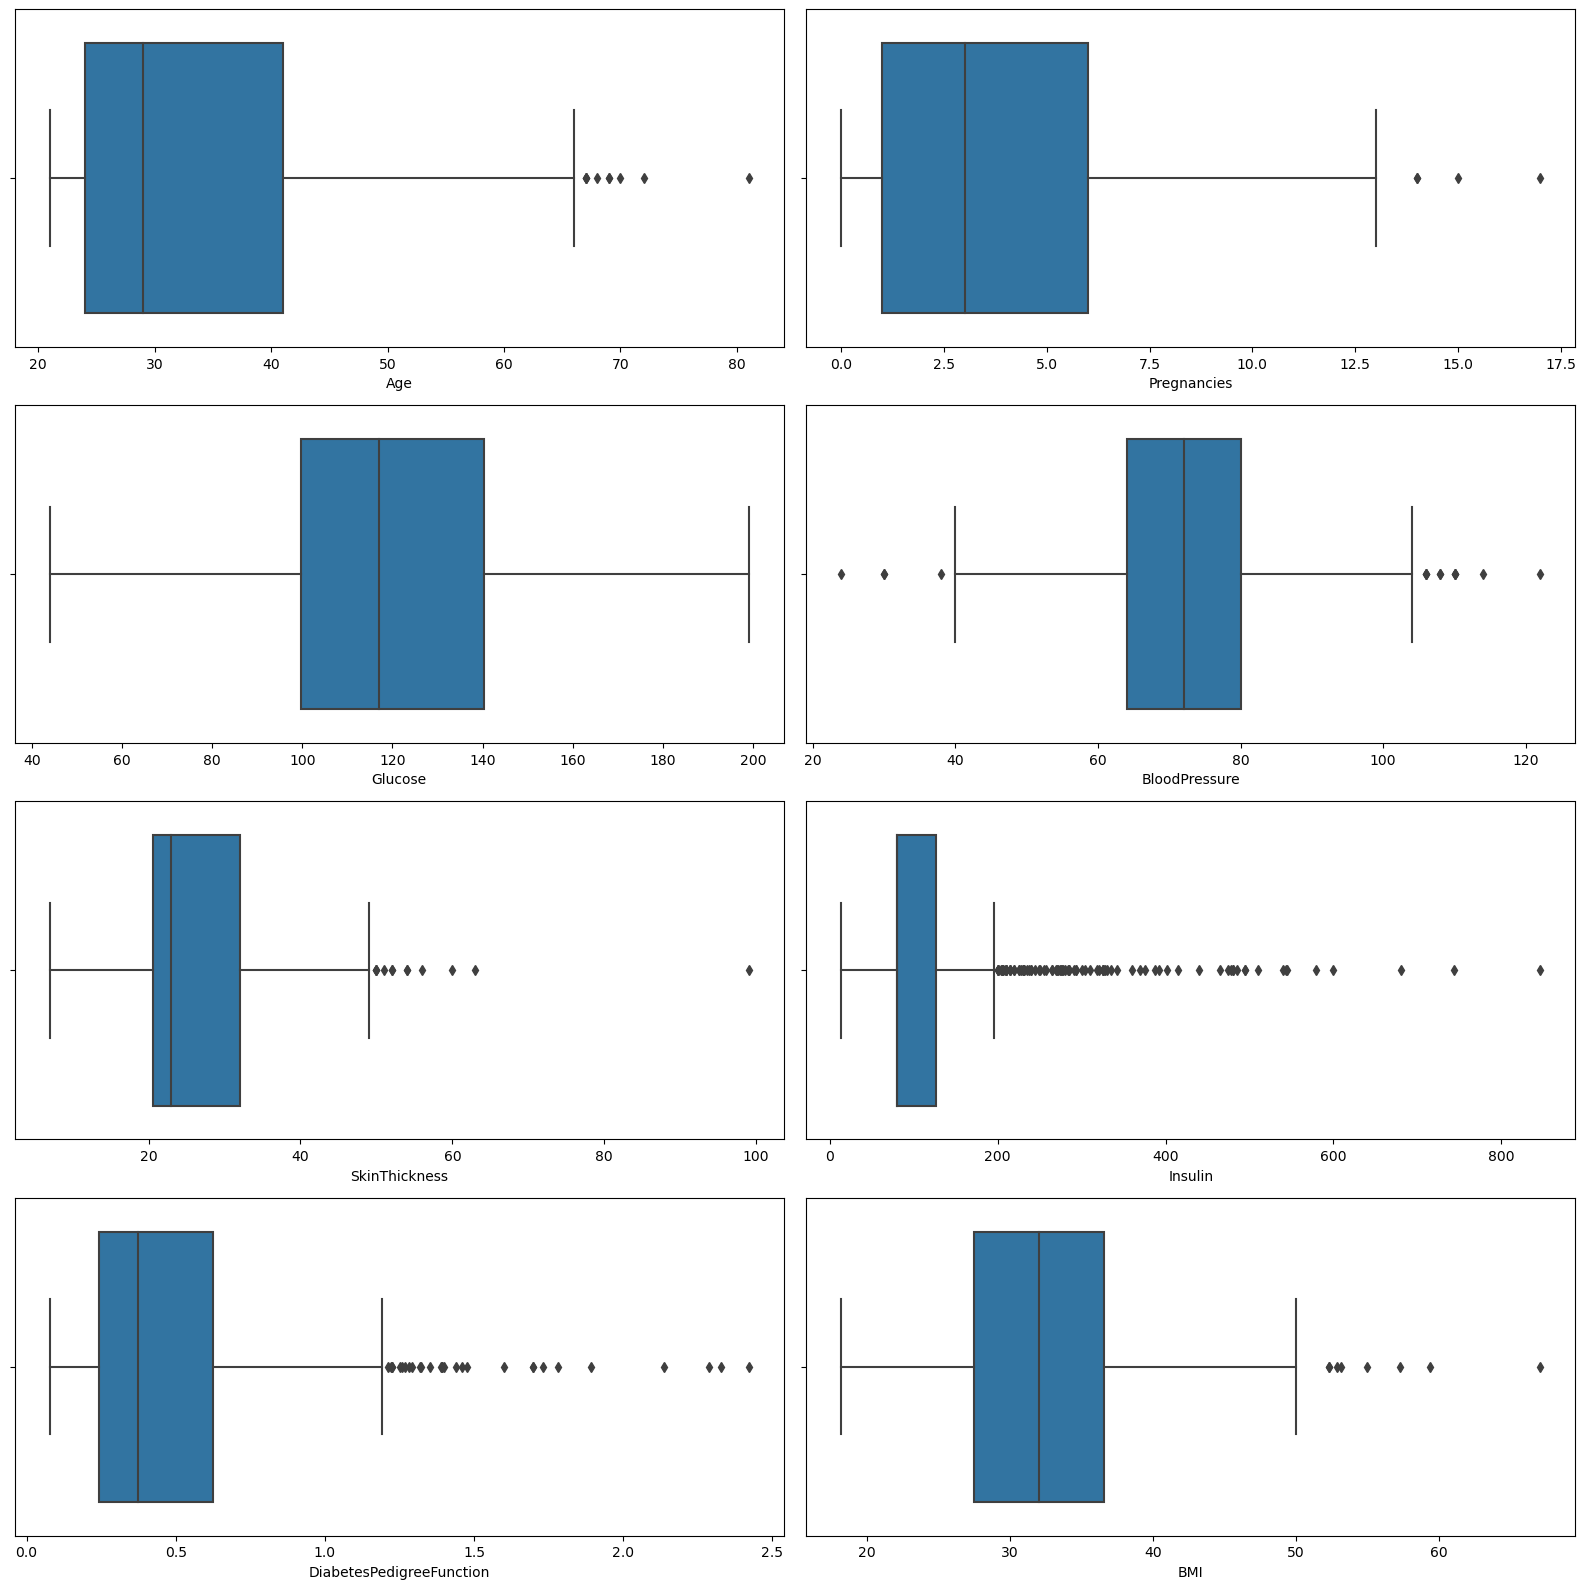

In [18]:
'''
The black diamonds/dots show the outliers present in each column/feature

!!! Domain knowledge is required for the below 
(Additional "Outlier Treatments can be considered based on this")
'''


# Create a figure with 4 rows and 2 columns
fig, ax = plt.subplots(4, 2, figsize=(16, 16))

# Plot boxplots for each variable
sns.boxplot(x=df.Age, ax=ax[0, 0])
sns.boxplot(x=df.Pregnancies, ax=ax[0, 1])
sns.boxplot(x=df.Glucose, ax=ax[1, 0])
sns.boxplot(x=df.BloodPressure, ax=ax[1, 1])
sns.boxplot(x=df.SkinThickness, ax=ax[2, 0])
sns.boxplot(x=df.Insulin, ax=ax[2, 1])
sns.boxplot(x=df.DiabetesPedigreeFunction, ax=ax[3, 0])
sns.boxplot(x=df.BMI, ax=ax[3, 1])

# Adjust layout and display
plt.tight_layout()
plt.show()


## CREATING BUCKETS FOR EACH COLUMN AND PLOTTING COUNTPLOTS FOR EACH

In [19]:
# age groups 
df['age-group'] = pd.cut(df['Age'], bins=[0, 15, 25, 35, 45, 55, 65, 75, 85, float('inf')],
                         labels=['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])

# Pregnancies groups
df['Pregnancy-groups'] = pd.cut(df['Pregnancies'], bins=[-1, 5, 10, 15, 20, float('inf')],
                                labels=['0-4', '5-9', '10-14', '15-19', '20+'])

# Glucose groups
df['glucose-groups'] = pd.cut(df['Glucose'], bins=[0, 50, 100, 150, float('inf')],
                              labels=['0-49', '50-99', '100-149', '150+'])

# Blood Pressure groups
df['blood-pressure-groups'] = pd.cut(df['BloodPressure'], bins=[0, 50, 100, float('inf')],
                                     labels=['0-49', '50-99', '100+'])

# Skin Thickness groups
df['skin-thickness-groups'] = pd.cut(df['SkinThickness'], bins=[0, 20, 40, 60, 80, float('inf')],
                                     labels=['0-19', '20-39', '40-59', '60-79', '80+'])

# Insulin groups
df['Insulin-groups'] = pd.cut(df['Insulin'], bins=[0, 200, 400, 600, 800, float('inf')],
                              labels=['0-199', '200-399', '400-599', '600-799', '800+'])

# BMI groups
df['BMI-groups'] = pd.cut(df['BMI'], bins=[0, 20, 40, 60, float('inf')],
                          labels=['0-19', '20-39', '40-59', '60+'])

# Diabetes Pedigree Function groups
df['DiabetesPedigreeFunction-groups'] = pd.cut(df['DiabetesPedigreeFunction'], bins=[0, 0.5, 1.0, 1.5, 2.0, float('inf')],
                                               labels=['0-0.49', '0.5-0.99', '1.0-1.49', '1.5-1.99', '2.0+'])


In [20]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age-group,Pregnancy-groups,glucose-groups,blood-pressure-groups,skin-thickness-groups,Insulin-groups,BMI-groups,DiabetesPedigreeFunction-groups
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,45-54,5-9,100-149,50-99,20-39,0-199,20-39,0.5-0.99
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,25-34,0-4,50-99,50-99,20-39,0-199,20-39,0-0.49
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,25-34,5-9,150+,50-99,20-39,0-199,20-39,0.5-0.99
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,15-24,0-4,50-99,50-99,20-39,0-199,20-39,0-0.49
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,25-34,0-4,100-149,0-49,20-39,0-199,40-59,2.0+


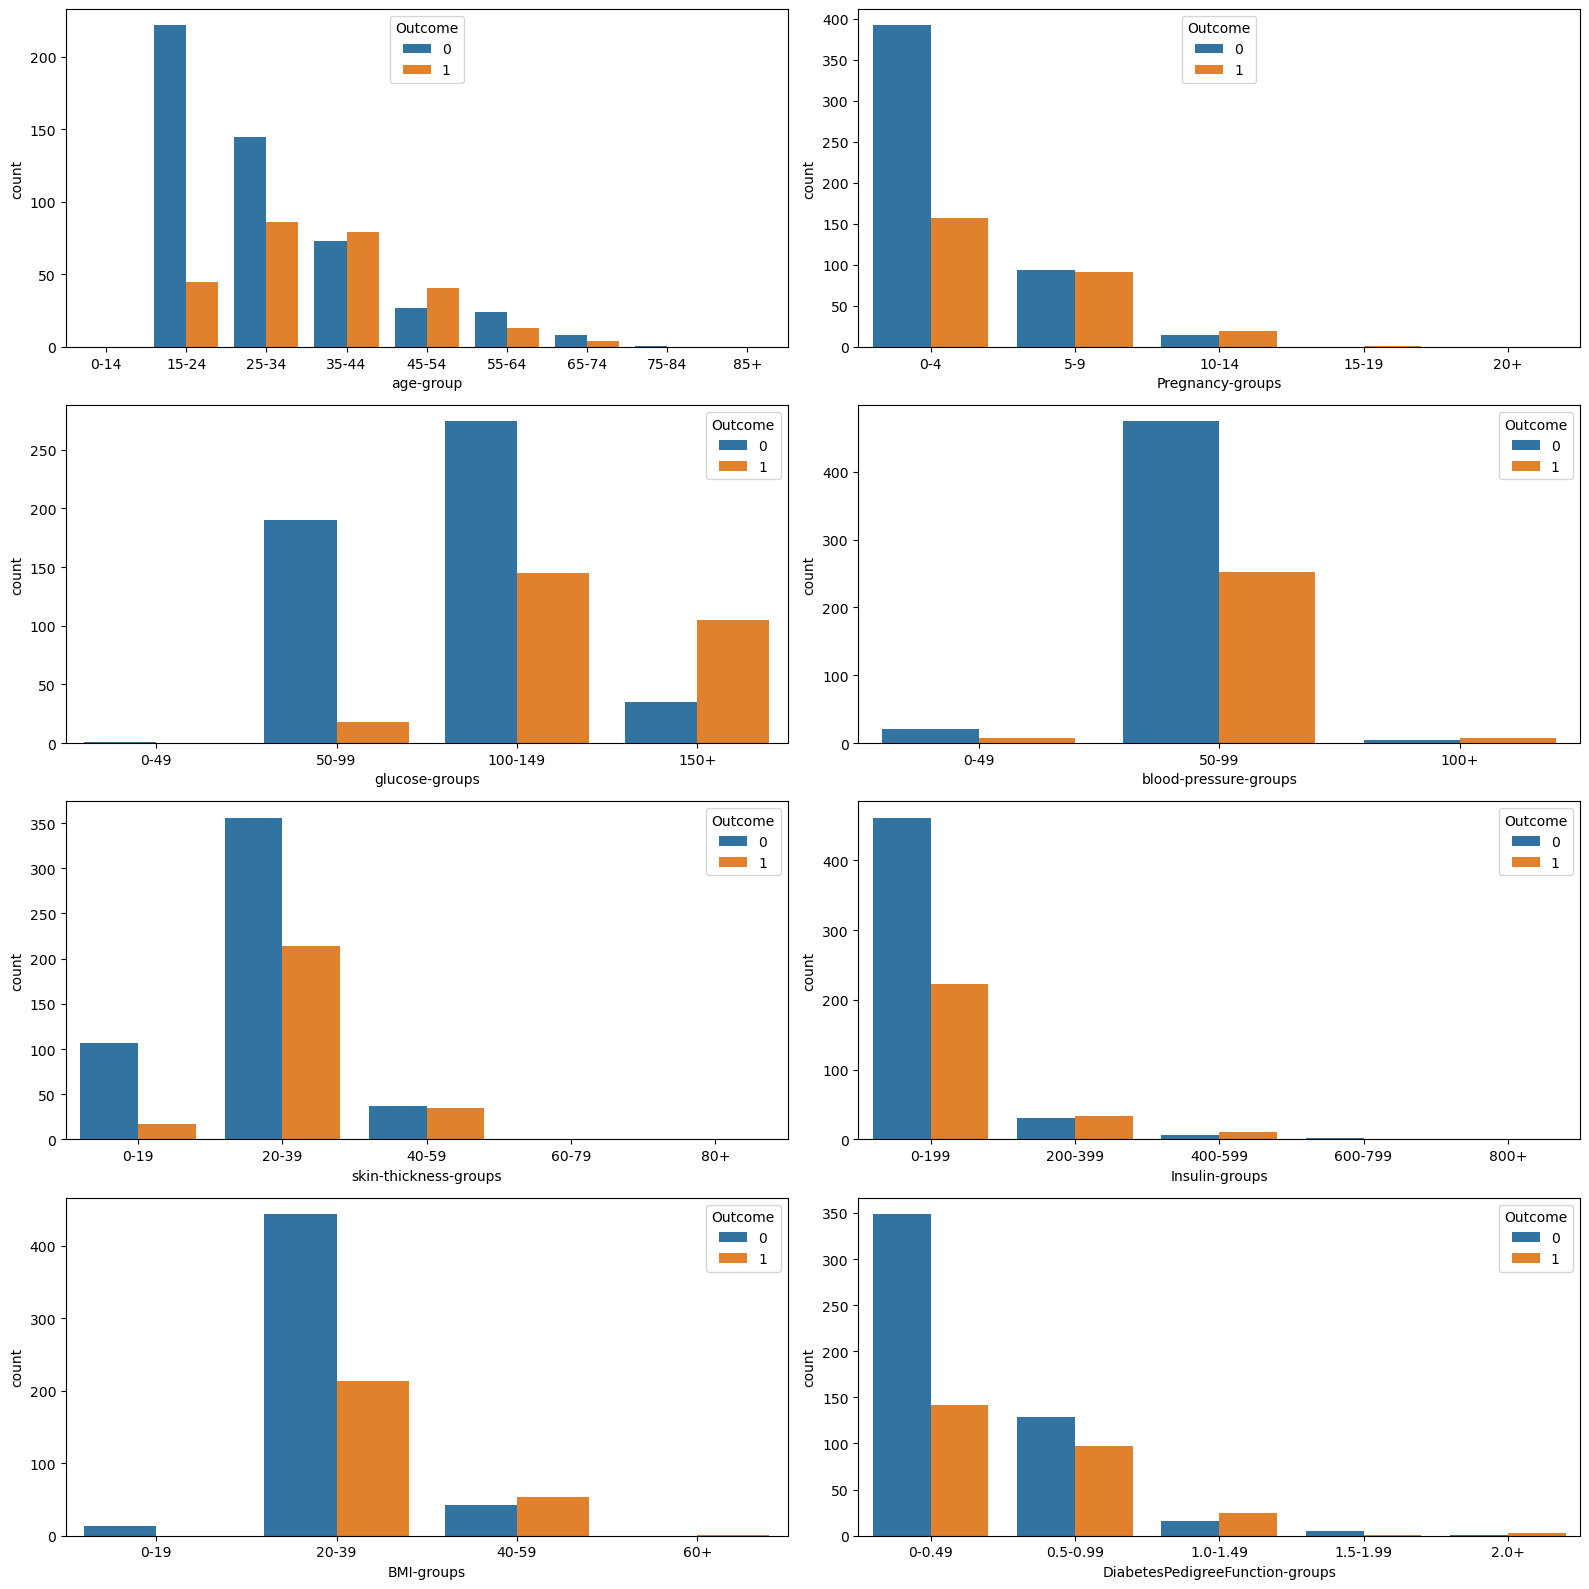

In [21]:
# Create a figure with 4 rows and 2 columns
fig, ax = plt.subplots(4, 2, figsize=(16, 16))

# Plot count plots for each variable
sns.countplot(x="age-group", hue="Outcome", data=df, ax=ax[0, 0])
sns.countplot(x="Pregnancy-groups", hue="Outcome", data=df, ax=ax[0, 1])
sns.countplot(x="glucose-groups", hue="Outcome", data=df, ax=ax[1, 0])
sns.countplot(x="blood-pressure-groups", hue="Outcome", data=df, ax=ax[1, 1])
sns.countplot(x="skin-thickness-groups", hue="Outcome", data=df, ax=ax[2, 0])
sns.countplot(x="Insulin-groups", hue="Outcome", data=df, ax=ax[2, 1])
sns.countplot(x="BMI-groups", hue="Outcome", data=df, ax=ax[3, 0])
sns.countplot(x="DiabetesPedigreeFunction-groups", hue="Outcome", data=df, ax=ax[3, 1])

# Adjust layout and display
plt.tight_layout()
plt.show()


## SCATTER PLOTS OF THE NON-BUCKETED COLUMNS

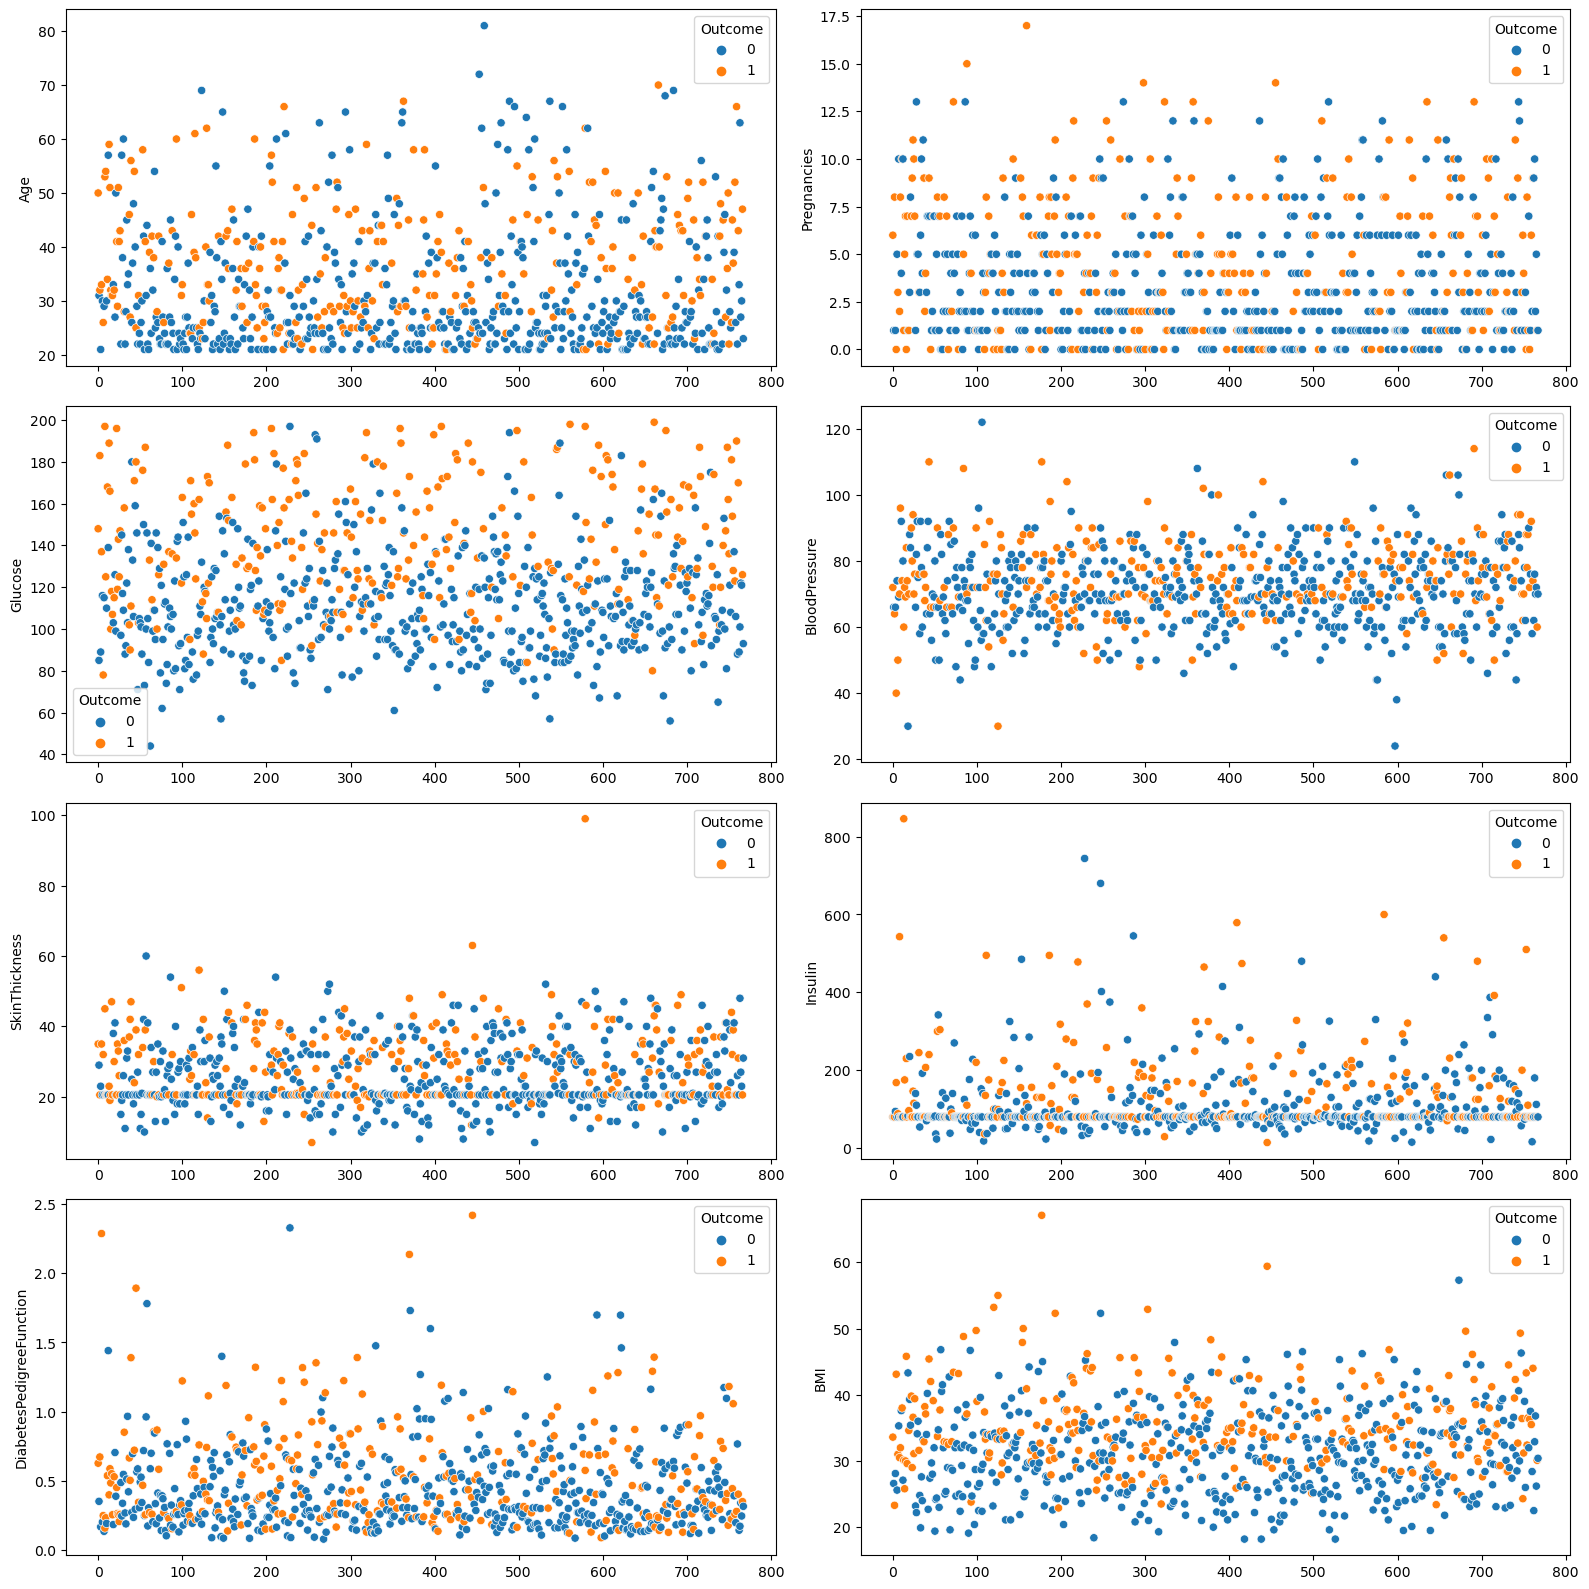

In [22]:
# Create a figure with 4 rows and 2 columns
fig, ax = plt.subplots(4, 2, figsize=(16, 16))

# Plot scatter plots for each variable
sns.scatterplot(x=df.index, y=df['Age'], hue=df['Outcome'], ax=ax[0, 0])
sns.scatterplot(x=df.index, y=df['Pregnancies'], hue=df['Outcome'], ax=ax[0, 1])
sns.scatterplot(x=df.index, y=df['Glucose'], hue=df['Outcome'], ax=ax[1, 0])
sns.scatterplot(x=df.index, y=df['BloodPressure'], hue=df['Outcome'], ax=ax[1, 1])
sns.scatterplot(x=df.index, y=df['SkinThickness'], hue=df['Outcome'], ax=ax[2, 0])
sns.scatterplot(x=df.index, y=df['Insulin'], hue=df['Outcome'], ax=ax[2, 1])
sns.scatterplot(x=df.index, y=df['DiabetesPedigreeFunction'], hue=df['Outcome'], ax=ax[3, 0])
sns.scatterplot(x=df.index, y=df['BMI'], hue=df['Outcome'], ax=ax[3, 1])

# Adjust layout and display
plt.tight_layout()
plt.show()


## THESE ARE FEW PLOTS AND DATA VISUALIZATION TECHNIQUES TO UNDESTAND THE DATASET, OTHER METHODS CAN ALSO BE CONSIDERED FOR FURTHER UNDERSTANDING AND DISCOVERY OF NEW PATTERNS